# Tensorflow MLP Classification

This notebook explores the classification problem with Tensorflow and feed-forward neural network (Multi-layer perceptron) using Pima Indians Diabetes Database obtained from Kaggle [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database).



In [708]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [709]:
tf.__version__

'2.5.0'

In [710]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [711]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explaratory data analysis

In [712]:
path = "/content/drive/My Drive/Projects/diabetes.csv"
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [713]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [714]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [716]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

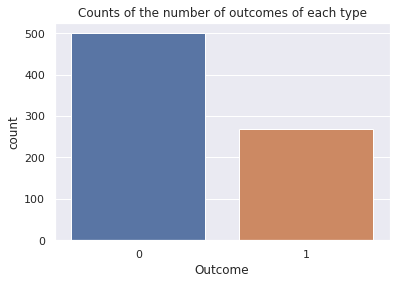

In [717]:
cntplt = sns.countplot(x="Outcome", data=df)
cntplt.set_title("Counts of the number of outcomes of each type")
plt.show()

In [718]:
X, y  =  df.iloc[:, :-1], df.iloc[:, -1]
X = X.astype('float32')

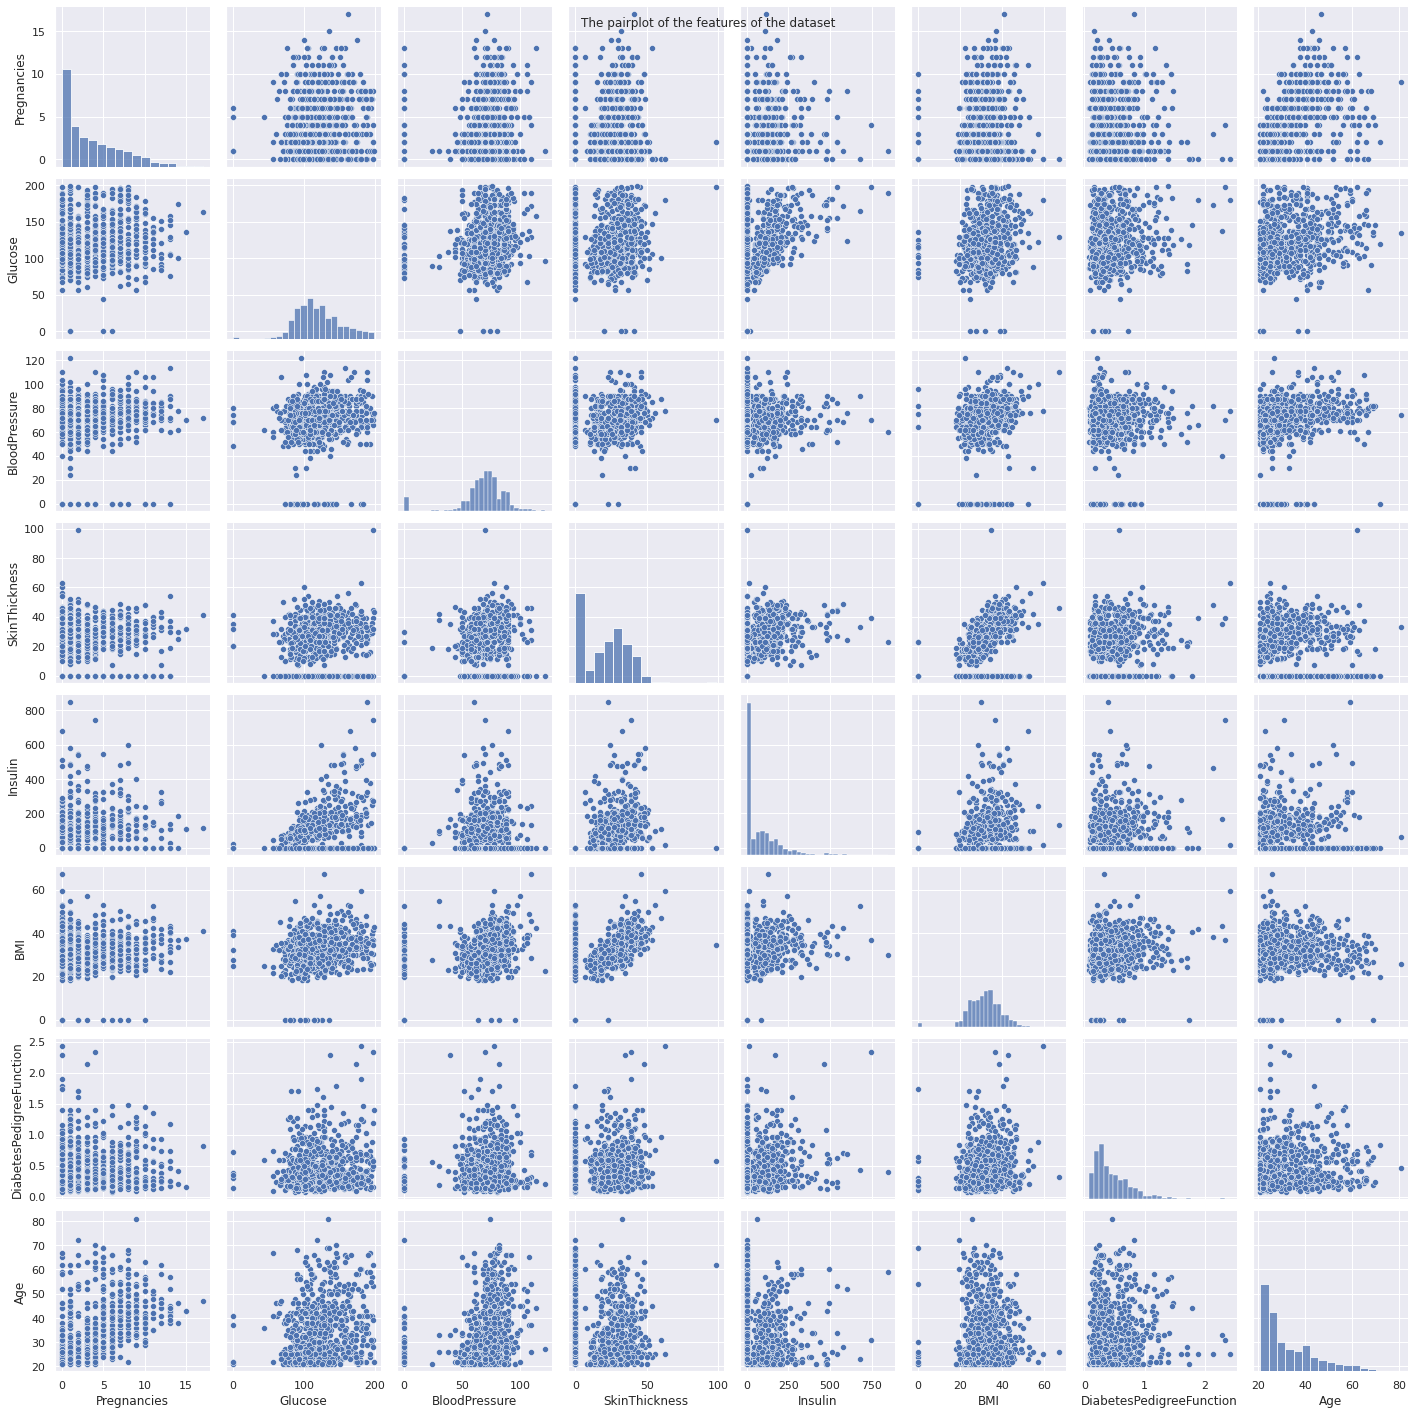

In [719]:
pair_plot = sns.pairplot(data=X)
pair_plot.fig.suptitle("The pairplot of the features of the dataset")
plt.show()

In [720]:
correlation = df.corr()

In [721]:
!curl -O https://raw.githubusercontent.com/javaeeeee/MachineLearningNotebooks/main/utils.ipynb
%run utils.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6672  100  6672    0     0   155k      0 --:--:-- --:--:-- --:--:--  155k


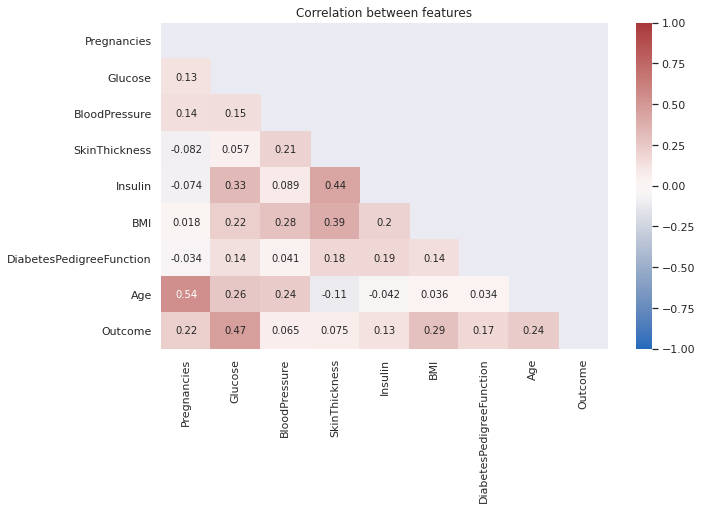

In [722]:
plot_correlation_between_features(correlation, 10, 6)

## Train and evaluate a model

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [724]:
X_train.shape

(614, 8)

In [725]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
normalizer.mean.numpy()

array([  3.793159  , 120.128654  ,  68.71333   ,  20.081436  ,
        80.09283   ,  32.021496  ,   0.46552283,  33.265465  ],
      dtype=float32)

In [726]:
model = Sequential()
model.add(normalizer)
model.add(Dense(5, input_shape=(X_train.shape[1],),
                activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(5, activation="relu",
                kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [727]:
model.compile(tf.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

### Fit on GPU

In [728]:
def plot_loss(history_df):
  """
  Plots the loss and validation loss during the training
  of a neural network.
  :param history_df - Pandas DataFrame containing training history.
  :return - None
  """
  sns.set_theme()
  sns.lineplot(data=history_df[["loss", "val_loss"]])
  plt.title("Loss and Validation Loss vs Epoch #")
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.show()

In [729]:
%%time
with tf.device("/:GPU:0"):
    history = model.fit(X_train, y_train, batch_size=16, epochs=1024, verbose=0, validation_split=0.2)

CPU times: user 1min 40s, sys: 12.5 s, total: 1min 53s
Wall time: 1min 20s


In [730]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5946 - binary_accuracy: 0.6948


[0.5946295857429504, 0.6948052048683167]

In [731]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.776303,0.533605,0.747154,0.634146
1,0.808569,0.665988,0.745193,0.634146
2,0.805348,0.659878,0.743360,0.634146
3,0.811638,0.670061,0.741382,0.634146
4,0.775162,0.668024,0.739746,0.634146


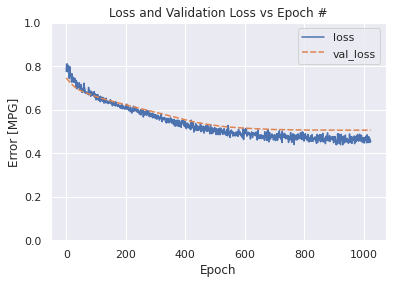

In [732]:
plot_loss(history_df)

In [733]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_21 (Normalizat (None, 8)                 17        
_________________________________________________________________
dense_64 (Dense)             (None, 5)                 45        
_________________________________________________________________
dropout_10 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_65 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_11 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 6         
Total params: 98
Trainable params: 81
Non-trainable params: 17
________________________________________________________

In [734]:
preds = model.predict_classes(X_test)
preds[:10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [735]:
# Confusion Matrix
cmatrix = tf.math.confusion_matrix(y_test, preds)
cmatrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[73, 14],
       [33, 34]], dtype=int32)>

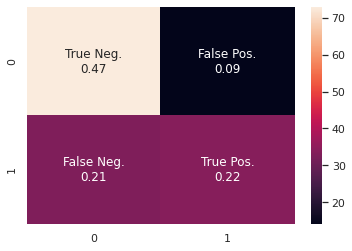

In [736]:
plot_confusion_matrix(cmatrix.numpy())